<a href="https://colab.research.google.com/github/drewamorbordelon/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS19_Regression1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

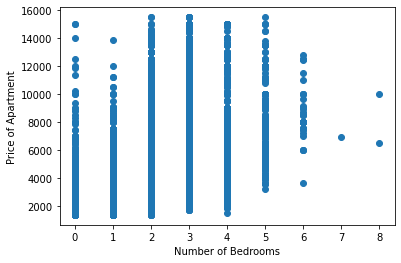

In [ ]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price of Apartment')
plt.show()

#Split our **target** from **featured martix**

In [ ]:
target = 'price'
features = ['bedrooms']
y_train = df[target]
X_train = df[features] # feature matrix must have 2Dimensions (2D)

In [ ]:
X_train.shape

(48818, 1)

# Establish a Baseline

In [ ]:
# Start with the mean because this is a regression
# MAE = Average of All absolute errors
from sklearn.metrics import mean_absolute_error

y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Baseline MAE: 1201.5251847945751


In [ ]:
y_train.mean()

3579.5609816051456

In [ ]:
y_pred[:10]

[3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456,
 3579.5609816051456]

# Build a Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Step1: Instantiate the model
model=LinearRegression()

# Step2: Fit the model to the Training Data
model.fit(X_train,y_train)

# Step3: Make predictions with the model
y_pred = model.predict(X_train)

# Checking the metrics

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, y_pred))

Training MAE: 975.6559731054491


# Investigate the Model further

In [ ]:
import plotly.express as px

In [ ]:
plt.scatter(X,y_train)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price of Apartment')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
print(f'PRICE = {model.intercept_} + {model.coef_[0]} x number of bedrooms')

In [ ]:
type(model)

# Apply the model to new data

In [ ]:
bedrooms = 9
X_test = [[bedrooms]]
y_pred = model.predict(X_test)
print(f'The Predicted Price for apartment with {bedrooms} bedrooms:', y_pred)

In [ ]:
y.head()

In [ ]:
X.head()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

## Stretch Goal

In [ ]:
# Create a Linear Regression using two features
twofeature_reg = linear_model.LinearRegression()
twofeature_reg.fit(df[['bedrooms', 'bathrooms']], df['price'])